# WeatherPy_HW_Vojvodic
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Dependencies and Setup
Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import pytemperature
import csv
import os
%logstart -o -q output_data/python_log.csv
%logoff

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
csvfile = "cities.csv"
output_path = os.path.join("output_data", "cities.csv")


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Switching logging OFF


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        
with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(cities)
        
# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# citi = cities
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
owm.utils.load_config
settings = {"units": units, "APPID": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
weather_response = []
cityList = []
citNam = []
lat = []
temp = []
humi = []
eSea = []
eGnd = []
clouds = []
wind = []
code = []

# for citi in cities:
#     weather_response = owm.find_city(citi, **settings)
#     selection = ('id','coord.lat','coord.lon')
#     data = weather_response(selection)
#     cityList.append(data)
    
# Loop through the list of cities and perform a request for data on each
# for city in cities:
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
#     cloud.append(response['clouds']['all'])
#     wind.append(response['wind']['speed'])
# logger.disabled = True
# logger.disabled = False

# cnt=1
with open('output_data/data.json', 'w', encoding='utf-8') as f:

    %logon -o -q
    for city in cities:

        response = requests.get(query_url + city).json()
        json.dump(response, f, ensure_ascii=False, indent=4)
        response1=response
        try:    
            print(f"For the city named {(response1['name'])}, ID Number-{(response1['id'])}: LAT={(response1['coord']['lat'])} WIND={(response1['wind']['speed'])} HUMIDITY={(response['main']['humidity'])} TEMP={(response1['main']['temp_max'])} CLOUDINESS={(response1['clouds']['all'])}")
            response1=[]
            citNam.append(response['name']) #and citNam.append(cnt)
            code.append(response['id'])
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp_max'])
            humi.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            eSea.append(response['main']['sea_level'])
            eGnd.append(response['main']['grnd_level'])

        except KeyError:
    #             print(f"The NAME is NO GOOD")
                next
#     print(f"The {code} information received is: {wind}")
#     print(f"The latitude information received is: {lat}")
#     print(f"The temperature information received is: {temp}")
#     print(f"The cloud information received is: {cloud}")
#     print(f"The wind information received is: {wind}")

#     print(f"The {city} latitude information received is: {lat}")
#     print(f"The  {city} temperature information received is: {temp}")
#     print(f"The  {city} cloud information received is: {cloud}")
#     print(f"The  {city} wind information received is: {wind}")
    
# # loop throught the list of units and append them to cityList list
# for citi in cities:
#     query_url = f"{url}appid={api_key}&q={citi}"
#     weather_response = requests.get(query_url)
#     response= weather_response.json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
#     cloud.append(response['clouds']['all'])
#     wind.append(response['wind']['speed'])
#     cityList.append(weather_json)
    
#     for city in cities:
#     response = requests.get(query_url + city).json()
#     selection = ('name','id','coord.lat','coord.lon',"main.temp", 'main.temp_max',"main.humidity", "wind.speed",'clouds.all')


Switching logging ON
For the city named Mataura, ID Number-6201424: LAT=-46.19 WIND=1.01 HUMIDITY=99 TEMP=37.99 CLOUDINESS=0
For the city named Srednekolymsk, ID Number-2121025: LAT=67.46 WIND=14.54 HUMIDITY=61 TEMP=46.38 CLOUDINESS=100
For the city named Albany, ID Number-5106834: LAT=42.65 WIND=4.7 HUMIDITY=47 TEMP=79 CLOUDINESS=75
For the city named Ancud, ID Number-3899695: LAT=-41.87 WIND=5.82 HUMIDITY=61 TEMP=50 CLOUDINESS=40
For the city named Gawler, ID Number-2071059: LAT=-34.6 WIND=5.82 HUMIDITY=93 TEMP=52 CLOUDINESS=75
For the city named Atuona, ID Number-4020109: LAT=-9.8 WIND=17.34 HUMIDITY=72 TEMP=80.58 CLOUDINESS=29
For the city named Hermanus, ID Number-3366880: LAT=-34.42 WIND=14 HUMIDITY=96 TEMP=50 CLOUDINESS=100
For the city named Punta Arenas, ID Number-3874787: LAT=-53.16 WIND=9.17 HUMIDITY=74 TEMP=37.4 CLOUDINESS=40
For the city named Ribeira Grande, ID Number-3372707: LAT=38.52 WIND=17.22 HUMIDITY=94 TEMP=73.4 CLOUDINESS=75
For the city named Melita, ID Number-60

For the city named Balakhta, ID Number-1510998: LAT=55.38 WIND=2.24 HUMIDITY=90 TEMP=51.06 CLOUDINESS=67
For the city named Tandil, ID Number-3427833: LAT=-37.33 WIND=3.2 HUMIDITY=40 TEMP=48.99 CLOUDINESS=43
For the city named Thompson, ID Number-6165406: LAT=55.74 WIND=9.17 HUMIDITY=27 TEMP=89.6 CLOUDINESS=40
For the city named San Quintin, ID Number-1688687: LAT=17.54 WIND=2.66 HUMIDITY=91 TEMP=75 CLOUDINESS=100
For the city named Longyearbyen, ID Number-2729907: LAT=78.22 WIND=2.24 HUMIDITY=75 TEMP=46.4 CLOUDINESS=75
For the city named Tigil, ID Number-2120612: LAT=57.8 WIND=4.34 HUMIDITY=55 TEMP=48 CLOUDINESS=34
For the city named Gat, ID Number-2249901: LAT=14.69 WIND=11.41 HUMIDITY=74 TEMP=80.6 CLOUDINESS=0
For the city named Ketchikan, ID Number-5554428: LAT=55.34 WIND=20.8 HUMIDITY=63 TEMP=64.4 CLOUDINESS=90
For the city named Bambanglipuro, ID Number-1650434: LAT=-7.95 WIND=12.39 HUMIDITY=83 TEMP=74.64 CLOUDINESS=92
For the city named Saint George, ID Number-262462: LAT=39.45 

For the city named Mehamn, ID Number-778707: LAT=71.03 WIND=2.24 HUMIDITY=87 TEMP=64.4 CLOUDINESS=0
For the city named Touros, ID Number-3386213: LAT=-5.2 WIND=8.05 HUMIDITY=69 TEMP=80.6 CLOUDINESS=20
For the city named Rassvet, ID Number-528075: LAT=49.11 WIND=10.49 HUMIDITY=48 TEMP=75 CLOUDINESS=67
For the city named Bubaque, ID Number-2374583: LAT=11.28 WIND=10.6 HUMIDITY=84 TEMP=78.24 CLOUDINESS=100
For the city named Tuatapere, ID Number-2180815: LAT=-46.13 WIND=1.01 HUMIDITY=99 TEMP=37.99 CLOUDINESS=0
For the city named Sena Madureira, ID Number-3662155: LAT=-9.07 WIND=2.39 HUMIDITY=45 TEMP=90.12 CLOUDINESS=90
For the city named Isangel, ID Number-2136825: LAT=-19.55 WIND=5.82 HUMIDITY=77 TEMP=69.8 CLOUDINESS=75
For the city named Sorland, ID Number-3137469: LAT=67.67 WIND=10.29 HUMIDITY=82 TEMP=60.8 CLOUDINESS=75
For the city named Lavrentiya, ID Number-4031637: LAT=65.58 WIND=4.92 HUMIDITY=96 TEMP=44.76 CLOUDINESS=100
For the city named Vozhega, ID Number-471245: LAT=60.47 WIND

For the city named Mayo, ID Number-6068416: LAT=63.59 WIND=5.82 HUMIDITY=41 TEMP=75.2 CLOUDINESS=75
For the city named Roald, ID Number-3141667: LAT=62.58 WIND=5.82 HUMIDITY=88 TEMP=68 CLOUDINESS=75
For the city named Ust-Ilimsk, ID Number-2013952: LAT=57.96 WIND=2.98 HUMIDITY=60 TEMP=59.88 CLOUDINESS=11
For the city named Majenang, ID Number-1636808: LAT=-7.3 WIND=0.65 HUMIDITY=91 TEMP=70.14 CLOUDINESS=100
For the city named South Sioux City, ID Number-5079250: LAT=42.47 WIND=2.26 HUMIDITY=41 TEMP=82 CLOUDINESS=1
For the city named Luau, ID Number-876177: LAT=-10.7 WIND=3.74 HUMIDITY=31 TEMP=61.68 CLOUDINESS=0
For the city named Aitape, ID Number-2101169: LAT=-3.15 WIND=4.92 HUMIDITY=87 TEMP=75.54 CLOUDINESS=100
For the city named Egvekinot, ID Number-4031742: LAT=66.32 WIND=2.55 HUMIDITY=92 TEMP=44.04 CLOUDINESS=100
For the city named Saskylakh, ID Number-2017155: LAT=71.97 WIND=8.01 HUMIDITY=63 TEMP=48.36 CLOUDINESS=48
For the city named Vila, ID Number-3164565: LAT=45.18 WIND=2.24 

For the city named Nouadhibou, ID Number-2377457: LAT=20.93 WIND=19.46 HUMIDITY=69 TEMP=73.4 CLOUDINESS=11
For the city named Preobrazheniye, ID Number-2017658: LAT=42.9 WIND=1.54 HUMIDITY=94 TEMP=66.72 CLOUDINESS=98
For the city named Nicoya, ID Number-3622716: LAT=10.15 WIND=11.41 HUMIDITY=49 TEMP=91.4 CLOUDINESS=40
For the city named Ankang, ID Number-1789065: LAT=32.73 WIND=1.5 HUMIDITY=88 TEMP=65.82 CLOUDINESS=16
For the city named Codrington, ID Number-2160063: LAT=-28.95 WIND=9.17 HUMIDITY=93 TEMP=55.99 CLOUDINESS=0
For the city named Davila, ID Number-1715335: LAT=18.47 WIND=3.27 HUMIDITY=76 TEMP=79.5 CLOUDINESS=100
For the city named Opuwo, ID Number-3354077: LAT=-18.06 WIND=3.29 HUMIDITY=70 TEMP=50.88 CLOUDINESS=0
For the city named Richards Bay, ID Number-962367: LAT=-28.77 WIND=20.4 HUMIDITY=37 TEMP=74.82 CLOUDINESS=0
For the city named Vanimo, ID Number-2084442: LAT=-2.67 WIND=6.98 HUMIDITY=74 TEMP=81.12 CLOUDINESS=97
For the city named Kaitangata, ID Number-2208248: LAT=-

For the city named Saint-Joseph, ID Number-3037456: LAT=43.56 WIND=2.24 HUMIDITY=61 TEMP=84.2 CLOUDINESS=0
For the city named Ogori, ID Number-2346896: LAT=7.33 WIND=8.34 HUMIDITY=96 TEMP=71.94 CLOUDINESS=100
For the city named Barcelos, ID Number-3665098: LAT=-0.97 WIND=3.33 HUMIDITY=65 TEMP=85.08 CLOUDINESS=52
For the city named Khandyga, ID Number-2022773: LAT=62.65 WIND=4.7 HUMIDITY=44 TEMP=56.64 CLOUDINESS=10
For the city named Pitimbu, ID Number-3391889: LAT=-7.47 WIND=11.41 HUMIDITY=88 TEMP=77 CLOUDINESS=75
For the city named Klaksvik, ID Number-2618795: LAT=62.23 WIND=14.99 HUMIDITY=100 TEMP=55.4 CLOUDINESS=100
For the city named Xicotencatl, ID Number-3483063: LAT=23.02 WIND=11.99 HUMIDITY=53 TEMP=97 CLOUDINESS=0
For the city named Solnechnyy, ID Number-2016307: LAT=50.72 WIND=7.23 HUMIDITY=99 TEMP=48.9 CLOUDINESS=100
For the city named Santos Dumont, ID Number-3449427: LAT=-21.46 WIND=6.93 HUMIDITY=45 TEMP=68 CLOUDINESS=0
For the city named Kayerkan, ID Number-1497337: LAT=69

For the city named Cabedelo, ID Number-3404558: LAT=-6.97 WIND=11.41 HUMIDITY=88 TEMP=77 CLOUDINESS=75
For the city named Kribi, ID Number-2229761: LAT=2.94 WIND=12.08 HUMIDITY=85 TEMP=77.88 CLOUDINESS=70
For the city named Trairi, ID Number-3386177: LAT=-3.28 WIND=6.96 HUMIDITY=72 TEMP=76.26 CLOUDINESS=66
For the city named Lagoa, ID Number-2267254: LAT=37.14 WIND=2.24 HUMIDITY=65 TEMP=79 CLOUDINESS=0
For the city named Abrau-Dyurso, ID Number-584365: LAT=44.7 WIND=6.71 HUMIDITY=88 TEMP=71.6 CLOUDINESS=0
For the city named Kaseda, ID Number-1859964: LAT=31.42 WIND=1.99 HUMIDITY=100 TEMP=73 CLOUDINESS=100
For the city named Coahuayana, ID Number-3981460: LAT=18.62 WIND=2.84 HUMIDITY=68 TEMP=84.54 CLOUDINESS=11
For the city named Thinadhoo, ID Number-1337610: LAT=0.53 WIND=9.31 HUMIDITY=71 TEMP=83.46 CLOUDINESS=100
For the city named Kendari, ID Number-1640344: LAT=-3.99 WIND=2.35 HUMIDITY=93 TEMP=67.62 CLOUDINESS=91
For the city named Farmington, ID Number-5467328: LAT=36.73 WIND=4.7 H

In [4]:
ls=[citNam, code,  lat, temp, humi, clouds, wind ]
for l in ls:
    print(len(l))


552
552
552
552
552
552
552


In [5]:
dictionary = {}
dictionary={
    "City" : citNam, 
    "ID Code" : code, 
    "Latitude" : lat, 
    "Temperature" : temp,
    "Humidity" : humi,
    "Cloudiness" : clouds,
    "Wind" : wind
}
weather_data=pd.DataFrame(dictionary)
export_csv=weather_data.to_csv("output_data/weather_data_df.csv", index=False, header=True)
weather_data.head()

,City,ID Code,Latitude,Temperature,Humidity,Cloudiness,Wind
0,Mataura,6201424,-46.19,37.99,99,0,1.01
1,Srednekolymsk,2121025,67.46,46.38,61,100,14.54
2,Albany,5106834,42.65,79.00,47,75,4.70
3,Ancud,3899695,-41.87,50.00,61,40,5.82
4,Gawler,2071059,-34.60,52.00,93,75,5.82


#weather_data['Temperature'].describe()
#mean = 69.26
#median = 70.72
#mode = 86

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
Your objective is to build a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude

In [6]:
latitude=weather_data['Latitude']
temperature=weather_data['Temperature']
humidity= weather_data['Humidity']
cloudiness= weather_data['Cloudiness']
wind_speed= weather_data['Wind']

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


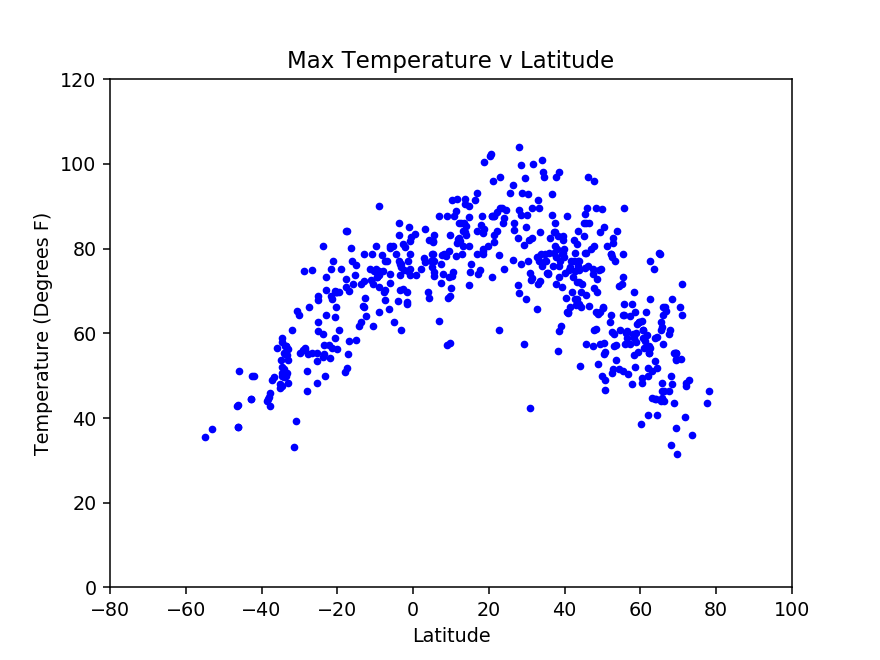

In [7]:
fig = plt.figure()
fig1=plt.scatter(latitude, temperature, marker='.', facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(0,120)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Max Temperature v Latitude")

plt.xlabel("Latitude")
plt.ylabel("Temperature (Degrees F)")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/temp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


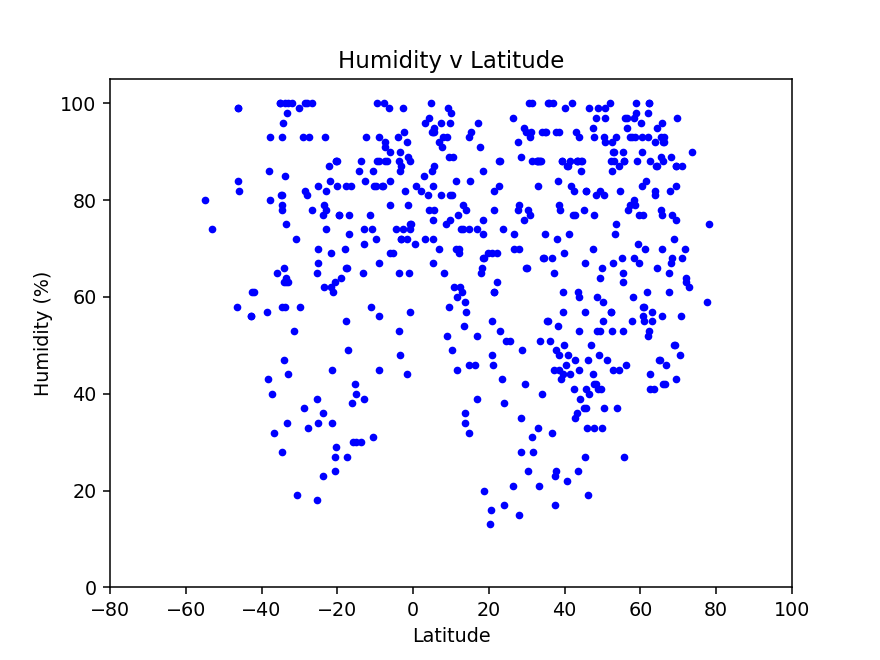

In [8]:
fig = plt.figure()
fig1=plt.scatter(latitude, humidity, marker=".", facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(0,105)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Humidity v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/humidity_v_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


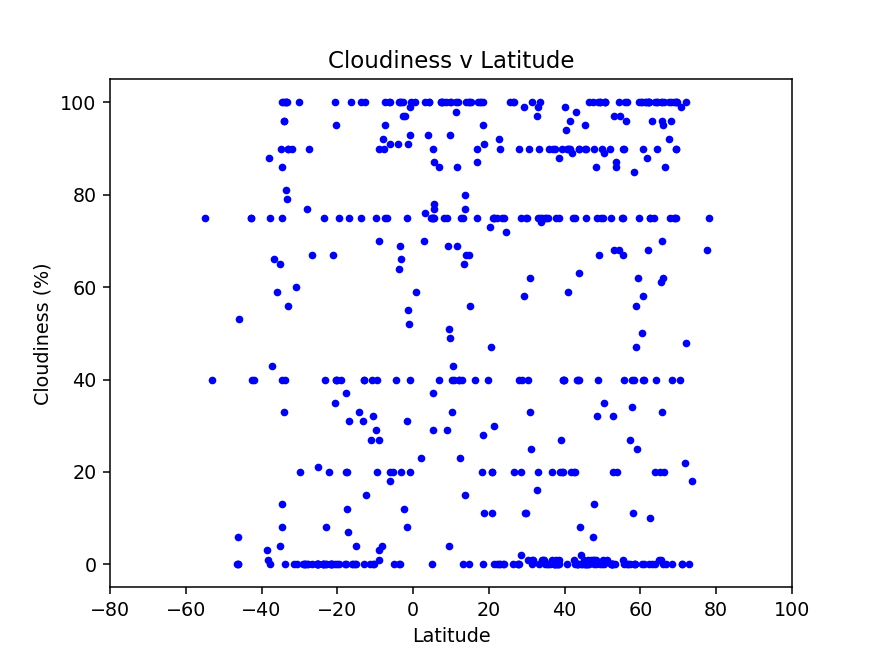

In [9]:
fig = plt.figure()
fig1=plt.scatter(latitude, cloudiness, marker=".", facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(-5,105)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Cloudiness v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/cloudiness_v_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


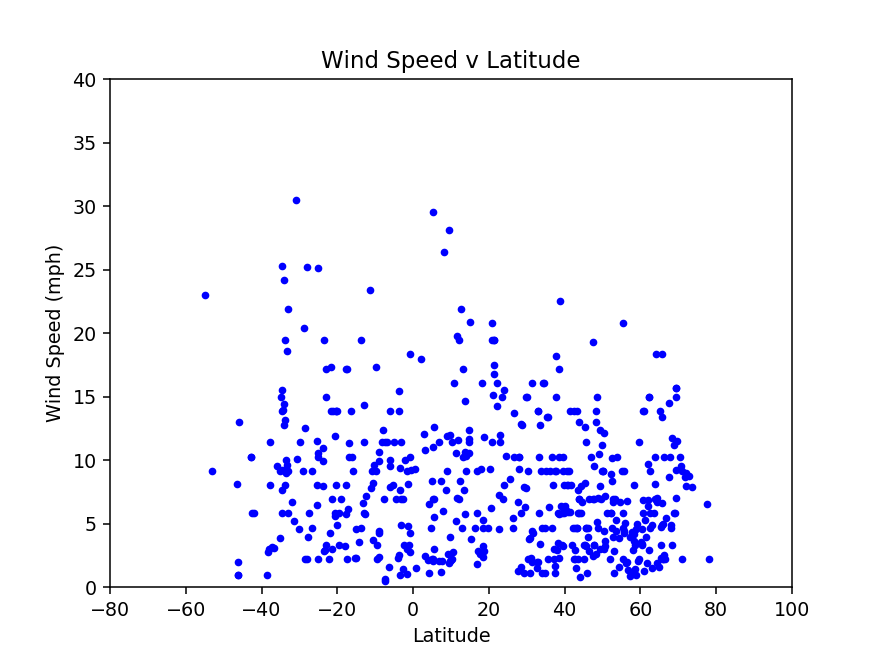

In [10]:
fig = plt.figure()
fig1=plt.scatter(latitude, wind_speed, marker=".", facecolors="blue", edgecolors="blue")
# Set the upper and lower limits of our y axis
plt.ylim(0,40)
# Set the upper and lower limits of our x axis
plt.xlim(-80,100)
# Create a title, x label, and y label for our chart
plt.title("Wind Speed v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("output_data/wind_speed_v_Latitude.png")
plt.show()

WeatherPy_Homework – Observable Trends

The following trends are observable in the output scatter plots. These warrant further investigation as there are several possible sources of error that require exclusion/inclusion. While the latitudes and longitudes were generated at random, the subsequent use of CitiPy to generate city names introduces possible selection bias into the city list sample. Also at issue here is the population concentration in the northers and eastern hemispherres.
Methodologically, the city list queried openweather API for current conditions, dropping those city names that produced a response error; another source of uncertainty depending on the cause of the error. 
The data was plotted individually versus latitude, rather than attempting to include cloudcover, wind and humidity in a single analysis. Other available temperature-effecting data, such as elevation, aspect (direction-facing), and distance from water werer omitted entirely.  
Observations:
1)	Temperature v. Latitude scatter plot shows a clear ‘inverted U’ distribution of temperatures, however the axis of symmetry is closer to 30 degrees latitude, rather than 0 degrees as predicted by the ‘hottest at the equator’ theory. 

2)	Humidity v Latitude scatter plot showed the highest values at the equator

3)	Wind Speed v Latitude showed nothing remarkable

4)	Cloudiness v Latitude showed an aggregation of values across all latitudes at 20%, 40%, 75%, and 100%. This may be due to weather prediction shorthand, or possibly have something to do with prevailing winds.

